In [1]:
import uproot4
import awkward1 as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep
import numba as nb
import h5py

In [2]:
import os
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-Dilepton/190621_214154/")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000")
os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0001")

['SlimmedNtuple_1000.root',
 'SlimmedNtuple_1001.root',
 'SlimmedNtuple_1002.root',
 'SlimmedNtuple_1003.root',
 'SlimmedNtuple_1004.root',
 'SlimmedNtuple_1005.root',
 'SlimmedNtuple_1006.root',
 'SlimmedNtuple_1007.root',
 'SlimmedNtuple_1008.root',
 'SlimmedNtuple_1009.root',
 'SlimmedNtuple_1010.root',
 'SlimmedNtuple_1011.root',
 'SlimmedNtuple_1012.root',
 'SlimmedNtuple_1013.root',
 'SlimmedNtuple_1014.root',
 'SlimmedNtuple_1015.root',
 'SlimmedNtuple_1016.root',
 'SlimmedNtuple_1017.root',
 'SlimmedNtuple_1018.root',
 'SlimmedNtuple_1019.root',
 'SlimmedNtuple_1020.root',
 'SlimmedNtuple_1021.root',
 'SlimmedNtuple_1022.root',
 'SlimmedNtuple_1023.root',
 'SlimmedNtuple_1024.root',
 'SlimmedNtuple_1025.root',
 'SlimmedNtuple_1026.root',
 'SlimmedNtuple_1027.root',
 'SlimmedNtuple_1028.root',
 'SlimmedNtuple_1029.root',
 'SlimmedNtuple_1030.root',
 'SlimmedNtuple_1031.root',
 'SlimmedNtuple_1032.root',
 'SlimmedNtuple_1033.root',
 'SlimmedNtuple_1034.root',
 'SlimmedNtuple_1035

In [3]:
root_ = uproot4.open( "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root" )
print ( "Number of events in tree: {}".format( np.array( root_["demo/SlimmedNtuple/event"] ).size ) )

tree_ = root_["demo/SlimmedNtuple"]
 
keys_nonproton = ["run", "event", "lumiblock",
        "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
        "pfcand_nextracks", "pfcand_nextracks_noDRl",
        "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi"]
keys_nonproton.extend( tree_.keys( filter_name="jet*") )
keys_nonproton.extend( tree_.keys( filter_name="muon*") )
keys = []
keys.extend( keys_nonproton )
keys.extend( tree_.keys( filter_name="proton*") )
keys.extend( tree_.keys( filter_name="pps*") )
print ( keys )

Number of events in tree: 5153
['run', 'event', 'lumiblock', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']


In [4]:
arrays = tree_.arrays( keys, library="ak", how="zip", entry_stop=10 )
ak.to_list( arrays )
#ak.to_list( arrays["pps_track"] )

[{'run': 297292,
  'event': 128628713,
  'lumiblock': 69,
  'num_bjets_ak8': 0,
  'num_bjets_ak4': 0,
  'num_jets_ak4': 2,
  'pfcand_nextracks': 71,
  'pfcand_nextracks_noDRl': 75,
  'recoMWhad': 58.1036376953125,
  'recoMWlep': 86.95140838623047,
  'recoMWW': 300.1686706542969,
  'recoRapidityWW': 0.23548376560211182,
  'dphiWW': -3.093693256378174,
  'WLeptonicPt': 11.837403297424316,
  'WLeptonicPhi': -1.7114585638046265,
  'jet': [{'pt': 214.39889526367188,
    'px': 40.18825912475586,
    'py': 210.59864807128906,
    'pz': -32.72289276123047,
    'energy': 224.52996826171875,
    'phi': 1.3822346925735474,
    'eta': -0.1520397812128067,
    'mass': 13.638528823852539,
    'tau1': 0.18013527989387512,
    'tau2': 0.14029963314533234,
    'corrmass': 14.686126708984375,
    'vertexz': 0.0}],
  'jet_jer': [],
  'muon': [{'pt': 49.072303771972656,
    'eta': 1.266785979270935,
    'phi': -1.8016575574874878,
    'px': -11.228528022766113,
    'py': -47.77040100097656,
    'pz': 80.1

In [5]:
protons = arrays["proton"]
protons["run"] = arrays["run"]
protons["event"] = arrays["event"]
protons["lumiblock"] = arrays["lumiblock"]
ppstracks = arrays["pps_track"]
ppstracks["run"] = arrays["run"]
ppstracks["event"] = arrays["event"]
ppstracks["lumiblock"] = arrays["lumiblock"]
print ( ak.to_list(protons) )
print ("\n")
print ( ak.to_list(ppstracks) )

[[], [{'xi': 0.1628560870885849, 'thx': 0.0, 'thy': -4.7834317228989676e-05, 't': -0.10880425572395325, 'ismultirp': 0, 'rpid': 103, 'arm': -999, 'run': 297292, 'event': 161859812, 'lumiblock': 87}, {'xi': 0.16536220908164978, 'thx': 0.0, 'thy': -4.647077003028244e-05, 't': -0.10497827082872391, 'ismultirp': 0, 'rpid': 123, 'arm': -999, 'run': 297292, 'event': 161859812, 'lumiblock': 87}, {'xi': 0.14250442385673523, 'thx': 2.254578794236295e-05, 'thy': -9.03031905181706e-05, 't': -0.3346894681453705, 'ismultirp': 1, 'rpid': -999, 'arm': 1, 'run': 297292, 'event': 161859812, 'lumiblock': 87}], [{'xi': 0.030152760446071625, 'thx': 0.0, 'thy': -7.945497782202438e-05, 't': -0.25951042771339417, 'ismultirp': 0, 'rpid': 23, 'arm': -999, 'run': 297308, 'event': 7891746, 'lumiblock': 10}, {'xi': 0.04407980665564537, 'thx': 0.0, 'thy': 4.130245361011475e-05, 't': -0.07068534940481186, 'ismultirp': 0, 'rpid': 123, 'arm': -999, 'run': 297308, 'event': 7891746, 'lumiblock': 10}, {'xi': 0.061582967

In [6]:
debug = False
fileNames = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_1.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-Dilepton/190621_214154/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000/SlimmedNtuple_merged_1.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000/SlimmedNtuple_merged_1.root"
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0001/SlimmedNtuple_merged_0.root"
]
firstEvent_ = 0
entrystop_ = None
label = "test"
read_size_ = "150MB"
random_protons = False

dset_chunk_size = 50000

columns_protons = ( "run", "lumiblock", "event", "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm",
                    "jet0_pt", "jet0_eta", "jet0_phi", "jet0_energy", "jet0_mass", "jet0_corrmass", "jet0_tau1", "jet0_tau2", "jet0_vertexz",
                    "muon0_pt", "muon0_eta", "muon0_phi", "muon0_energy", "muon0_charge", "muon0_iso", "muon0_dxy", "muon0_dz",
                    "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
                    "pfcand_nextracks", "pfcand_nextracks_noDRl",
                    "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi" )

columns_ppstracks = ( "run", "lumiblock", "event", "x", "y", "rpid" ) 

protons_keys = {}
for col_ in columns_protons:
    protons_keys[ col_ ] = col_

ppstracks_keys = {}
for col_ in columns_ppstracks:
    ppstracks_keys[ col_ ] = col_

counts_label_protons_ = "Proton" if not random_protons else "ProtonRnd"

with h5py.File( 'output-' + label + '.h5', 'w') as f:

    dset_protons_multiRP = f.create_dataset( 'protons_multiRP', ( dset_chunk_size, len( columns_protons ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_protons ) ) )
    print ( "Initial dataset shape: {}".format( dset_protons_multiRP.shape ) )

    dset_protons_singleRP = f.create_dataset( 'protons_singleRP', ( dset_chunk_size, len( columns_protons ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_protons ) ) )
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_1.root",
    
    print ( "Initial dataset shape: {}".format( dset_protons_singleRP.shape ) )
    
    dset_ppstracks = f.create_dataset( 'ppstracks', ( dset_chunk_size, len( columns_ppstracks ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_ppstracks ) ) )
    print ( "Initial dataset shape: {}".format( dset_ppstracks.shape ) )
    
    protons_multiRP_list = {}
    for col_ in columns_protons:
        protons_multiRP_list[ col_ ] = []           

    protons_singleRP_list = {}
    for col_ in columns_protons:
        protons_singleRP_list[ col_ ] = []           

    ppstracks_list = {}
    for col_ in columns_ppstracks:
        ppstracks_list[ col_ ] = []           

    selections = None
    counts = None
    
    dset_multiRP_slice = 0
    dset_multiRP_idx = 0
    dset_multiRP_entries = 0

    dset_singleRP_slice = 0
    dset_singleRP_idx = 0
    dset_singleRP_entries = 0
    
    dset_ppstracks_slice = 0
    dset_ppstracks_idx = 0
    dset_ppstracks_entries = 0
    
    for file_ in fileNames:
        print ( file_ ) 
        root_ = uproot4.open( file_ )

        print ( "Number of events in tree: {}".format( np.array( root_["demo/SlimmedNtuple/event"] ).size ) )

        tree_ = root_["demo/SlimmedNtuple"]

        for events_ in tree_.iterate( keys , library="ak", how="zip", step_size=read_size_, entry_start=firstEvent_, entry_stop=entrystop_ ):
            print ( len(events_), events_ )
            print ( "Num jets: {}".format( ak.num( events_["jet"] ) ) )
            print ( "Num muons: {}".format( ak.num( events_["muon"] ) ) )
            print ( "Num protons: {}".format( ak.num( events_["proton"] ) ) )
            print ( "Nu pps tracks: {}".format( ak.num( events_["pps_track"] ) ) )

            selections_ = []
            counts_ = []
            
            selections_.append( "All" )
            counts_.append( len( events_ ) )
            
            # Event selections
            msk_1jet = ( ak.num( events_["jet"] ) >= 1 )
            selections_.append( "Jet" )
            counts_.append( np.sum( np.array( msk_1jet ).astype("int32") ) )
            
            msk_1muon = msk_1jet & ( ak.num( events_["muon"] ) >= 1 )
            selections_.append( "Muon" )
            counts_.append( np.sum( np.array( msk_1muon ).astype("int32") ) )
            
            events_ = events_[ msk_1muon ]    
                             
            selections_ = np.array( selections_ )
            counts_ = np.array( counts_ )
                             
            if selections is None:
                selections = selections_
                counts = counts_
            else:
                msk_selections = np.full_like( selections, False, dtype='bool' )
                for key in selections_:
                    msk_selections |= ( selections == key )
                counts[ msk_selections ] += counts_
            
            # Randomize proton arrays
            #protons_ = events_["proton"]
            protons_ = None
            if random_protons:
                protons_ = events_["proton"]
            
                index_rnd_ = np.random.permutation( len( events_ ) )
            
                protons_rnd_ = protons_[ index_rnd_ ]
            
                events_[ "proton_rnd" ] = protons_rnd_    
        
                print ( "Num protons: {}".format( ak.num( events_["proton"] ) ) )
                print ( "Num protons randomized: {}".format( ak.num( events_["proton_rnd"] ) ) )    
            
            if not random_protons: protons_ = events_["proton"]
            else:                  protons_ = events_["proton_rnd"]
            
            protons_["run"]                    = events_["run"]
            protons_["lumiblock"]              = events_["lumiblock"]
            protons_["event"]                  = events_["event"]
            protons_["jet0_pt"]                = events_.jet.pt[:,0]
            protons_["jet0_eta"]               = events_.jet.eta[:,0]
            protons_["jet0_phi"]               = events_.jet.phi[:,0]
            protons_["jet0_energy"]            = events_.jet.energy[:,0]
            protons_["jet0_mass"]              = events_.jet.mass[:,0]
            protons_["jet0_corrmass"]          = events_.jet.corrmass[:,0]
            protons_["jet0_tau1"]              = events_.jet.tau1[:,0]
            protons_["jet0_tau2"]              = events_.jet.tau2[:,0]
            protons_["jet0_vertexz"]           = events_.jet.vertexz[:,0]
            protons_["muon0_pt"]               = events_.muon.pt[:,0]
            protons_["muon0_eta"]              = events_.muon.eta[:,0]
            protons_["muon0_phi"]              = events_.muon.phi[:,0]
            protons_["muon0_energy"]           = events_.muon.e[:,0]
            protons_["muon0_charge"]           = events_.muon.charge[:,0]
            protons_["muon0_iso"]              = events_.muon.iso[:,0]
            protons_["muon0_dxy"]              = events_.muon.dxy[:,0]
            protons_["muon0_dz"]               = events_.muon.dz[:,0]
            protons_["num_bjets_ak8"]          = events_["num_bjets_ak8"]
            protons_["num_bjets_ak4"]          = events_["num_bjets_ak4"]
            protons_["num_jets_ak4"]           = events_["num_jets_ak4"]
            protons_["pfcand_nextracks"]       = events_["pfcand_nextracks"]
            protons_["pfcand_nextracks_noDRl"] = events_["pfcand_nextracks_noDRl"]
            protons_["recoMWhad"]              = events_["recoMWhad"]
            protons_["recoMWlep"]              = events_["recoMWlep"]
            protons_["recoMWW"]                = events_["recoMWW"]
            protons_["recoRapidityWW"]         = events_["recoRapidityWW"]
            protons_["dphiWW"]                 = events_["dphiWW"]
            protons_["WLeptonicPt"]            = events_["WLeptonicPt"]
            protons_["WLeptonicPhi"]           = events_["WLeptonicPhi"]
            #protons_["x1"] = -999.
            #protons_["y1"] = -999.
            #protons_["x2"] = -999.
            #protons_["y2"] = -999.
            ppstracks_ = events_["pps_track"]
            ppstracks_["run"] = events_["run"]
            ppstracks_["lumiblock"] = events_["lumiblock"]
            ppstracks_["event"] = events_["event"]

            protons_singleRP_ = protons_[ protons_.ismultirp == 0 ]
            protons_multiRP_ = protons_[ protons_.ismultirp == 1 ]

            protons_singleRP_byRP_ = {}
            ppstracks_byRP_ = {}
            protons_multiRP_byArm_ = {}
            for rpid in ( 3, 23, 103, 123 ):
                #arm = -1
                #if   rpid == 3   or rpid == 23 : arm = 0
                #elif rpid == 103 or rpid == 123 : arm = 1
                #print ( "Arm: {}".format( arm ) )

                protons_singleRP_byRP_[ rpid ] =  protons_singleRP_[ protons_singleRP_.rpid == rpid ]
                ppstracks_byRP_[ rpid ] = ppstracks_[ ppstracks_.rpid == rpid ]
                #protons_singleRP_byRP_[ rpid ]["x1"] = ppstracks_byRP_[ rpid ].x
                #protons_singleRP_byRP_[ rpid ]["y1"] = ppstracks_byRP_[ rpid ].y

                print ( "\nNum protons RP {}: {}".format( rpid, ak.num( protons_singleRP_byRP_[ rpid ] ) ) )
                if debug:
                    print ( ak.to_list( protons_singleRP_byRP_[ rpid ] ) )
                    print ("\n")
                    print ( ak.to_list( ppstracks_byRP_[ rpid ] ) )

            for arm in ( 0, 1 ):
                protons_multiRP_byArm_[ arm ] = protons_multiRP_[ protons_multiRP_.arm == arm ]

                print ( "\nNum multi-RP protons Arm {}: {}".format( arm, ak.num( protons_multiRP_byArm_[ arm ] ) ) )
                if debug:
                    print ( ak.to_list( protons_multiRP_byArm_[ arm ] ) )

            #msk  =  np.array( ak.num( protons_singleRP_byRP_[ 3 ].xi ) == 1 )
            #msk &= np.array( ak.num( protons_singleRP_byRP_[ 23 ].xi ) == 1 )
            #msk &= np.array( ak.num( protons_singleRP_byRP_[ 103 ].xi ) == 1 )
            #msk &= np.array( ak.num( protons_singleRP_byRP_[ 123 ].xi ) == 1 )    

            msk_protons  = np.array( ak.num( protons_multiRP_byArm_[ 0 ] ) > 0 )
            msk_protons &= np.array( ak.num( protons_multiRP_byArm_[ 1 ] ) > 0 )

            protons_multiRP_sel_ = protons_multiRP_[ msk_protons ]
            protons_singleRP_sel_ = protons_singleRP_[ msk_protons ]
            ppstracks_sel_ = ppstracks_[ msk_protons ]
            print ("\n")
            if debug:
                print ( msk_protons )
            print ( len( protons_multiRP_sel_ ) )
            print ( ak.num( protons_multiRP_sel_ ) )
            if debug:
                print ("\n")
                print ( ak.to_list( protons_multiRP_sel_ ) )
                print ("\n")
                print ( ak.to_list( protons_singleRP_sel_ ) )
                print ("\n")
                print ( ak.to_list( ppstracks_sel_ ) )

            counts_protons_ = len( protons_[ msk_protons ] )
            if not counts_label_protons_ in selections:
                selections = np.concatenate( ( selections, np.array( [ counts_label_protons_ ] ) ) )
                counts = np.concatenate( ( counts, np.array( [counts_protons_] ) ) )
            else:    
                counts[ selections == counts_label_protons_ ] += counts_protons_ 
    
            print ( selections )
            print ( counts )
                             
            for col_ in columns_protons:
                protons_multiRP_list[ col_ ] = np.array( ak.flatten( protons_multiRP_sel_[ protons_keys[ col_ ] ] ) )

            arr_size_multiRP_ = len( protons_multiRP_list[ "xi" ] )
            print ( "Flattened array size multi-RP: {}".format( arr_size_multiRP_ ) )

            for col_ in columns_protons:
                protons_singleRP_list[ col_ ] = np.array( ak.flatten( protons_singleRP_sel_[ protons_keys[ col_ ] ] ) )

            arr_size_singleRP_ = len( protons_singleRP_list[ "xi" ] )
            print ( "Flattened array size single-RP: {}".format( arr_size_singleRP_ ) )

            for col_ in columns_ppstracks:
                ppstracks_list[ col_ ] = np.array( ak.flatten( ppstracks_sel_[ ppstracks_keys[ col_ ] ] ) )

            arr_size_ppstracks_ = len( ppstracks_list[ "x" ] )
            print ( "Flattened array size tracks: {}".format( arr_size_ppstracks_ ) )

            dset_multiRP_entries += arr_size_multiRP_
            dset_singleRP_entries += arr_size_singleRP_
            dset_ppstracks_entries += arr_size_ppstracks_

            if dset_multiRP_entries > dset_chunk_size:
                resize_factor_ = ( dset_multiRP_entries // dset_chunk_size )
                chunk_resize_  = resize_factor_ * dset_chunk_size

                print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
                dset_protons_multiRP.resize( ( dset_protons_multiRP.shape[0] + chunk_resize_ ), axis=0 )
                print ( "Dataset shape: {}".format( dset_protons_multiRP.shape ) )
                        
                dset_multiRP_slice += resize_factor_
                # Count the rest to the chunk size 
                dset_multiRP_entries = ( dset_multiRP_entries % dset_chunk_size )
                             
            if dset_singleRP_entries > dset_chunk_size:
                resize_factor_ = ( dset_singleRP_entries // dset_chunk_size )
                chunk_resize_  = resize_factor_ * dset_chunk_size

                print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
                dset_protons_singleRP.resize( ( dset_protons_singleRP.shape[0] + chunk_resize_ ), axis=0 )
                print ( "Dataset shape: {}".format( dset_protons_singleRP.shape ) )
                        
                dset_singleRP_slice += resize_factor_
                # Count the rest to the chunk size 
                dset_singleRP_entries = ( dset_singleRP_entries % dset_chunk_size )
                             
            if dset_ppstracks_entries > dset_chunk_size:
                resize_factor_ = ( dset_ppstracks_entries // dset_chunk_size )
                chunk_resize_  = resize_factor_ * dset_chunk_size

                print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
                dset_ppstracks.resize( ( dset_ppstracks.shape[0] + chunk_resize_ ), axis=0 )
                print ( "Dataset shape: {}".format( dset_ppstracks.shape ) )
                        
                dset_ppstracks_slice += resize_factor_
                # Count the rest to the chunk size 
                dset_ppstracks_entries = ( dset_ppstracks_entries % dset_chunk_size )
                             
            print ( "Stacking data." )
            data_protons_multiRP_ = np.stack( list( protons_multiRP_list.values() ), axis=1 )
            print ( data_protons_multiRP_.shape )
            print ( data_protons_multiRP_ )

            data_protons_singleRP_ = np.stack( list( protons_singleRP_list.values() ), axis=1 )
            print ( data_protons_singleRP_.shape )
            print ( data_protons_singleRP_ )

            data_ppstracks_ = np.stack( list( ppstracks_list.values() ), axis=1 )
            print ( data_ppstracks_.shape )
            print ( data_ppstracks_ )

            dset_idx_next_ = dset_multiRP_idx + arr_size_multiRP_
            print ( "Slice: {}".format( dset_multiRP_slice ) )
            print ( "Writing in positions ({},{})".format( dset_multiRP_idx, dset_idx_next_ ) )
            dset_protons_multiRP[ dset_multiRP_idx : dset_idx_next_ ] = data_protons_multiRP_
            dset_multiRP_idx = dset_idx_next_ 

            dset_idx_next_ = dset_singleRP_idx + arr_size_singleRP_
            print ( "Slice: {}".format( dset_singleRP_slice ) )
            print ( "Writing in positions ({},{})".format( dset_singleRP_idx, dset_idx_next_ ) )
            dset_protons_singleRP[ dset_singleRP_idx : dset_idx_next_ ] = data_protons_singleRP_
            dset_singleRP_idx = dset_idx_next_ 

            dset_idx_next_ = dset_ppstracks_idx + arr_size_ppstracks_
            print ( "Slice: {}".format( dset_ppstracks_slice ) )
            print ( "Writing in positions ({},{})".format( dset_ppstracks_idx, dset_idx_next_ ) )
            dset_ppstracks[ dset_ppstracks_idx : dset_idx_next_ ] = data_ppstracks_
            dset_ppstracks_idx = dset_idx_next_ 

        # Iteration on input files
        root_.close()

    # Reduce dataset to its final size 
    print ( "Reduce dataset." )
    dset_protons_multiRP.resize( ( dset_multiRP_idx ), axis=0 ) 
    print ( "Dataset shape: {}".format( dset_protons_multiRP.shape ) )

    dset_protons_singleRP.resize( ( dset_singleRP_idx ), axis=0 ) 
    print ( "Dataset shape: {}".format( dset_protons_singleRP.shape ) )

    dset_ppstracks.resize( ( dset_ppstracks_idx ), axis=0 ) 
    print ( "Dataset shape: {}".format( dset_ppstracks.shape ) )

    print ( "Writing column names and event counts.")

    columns_protons_ = np.array( columns_protons, dtype='S' )
    print ( columns_protons_ )

    columns_ppstracks_ = np.array( columns_ppstracks, dtype='S' )
    print ( columns_ppstracks_ )

    event_counts_ = counts
    print ( event_counts_ )

    selections_ = np.array( selections, dtype='S' )
    print ( selections_ )

    dset_columns_protons = f.create_dataset( 'columns_protons', data=columns_protons_ )
    dset_columns_ppstracks = f.create_dataset( 'columns_ppstracks', data=columns_ppstracks_ )
    dset_counts = f.create_dataset( 'event_counts', data=event_counts_ )
    dset_selections = f.create_dataset( 'selections', data=selections_ )

    print ( dset_protons_multiRP )
    print ( dset_protons_multiRP[-1] )
    print ( dset_protons_singleRP )
    print ( dset_protons_singleRP[-1] )   
    print ( dset_ppstracks )
    print ( dset_ppstracks[-1] )   

    print ( dset_columns_protons )
    print ( list( dset_columns_protons ) )
    print ( dset_columns_ppstracks )
    print ( list( dset_columns_ppstracks ) )   
    print ( dset_counts )
    print ( list( dset_counts ) )
    print ( dset_selections )
    print ( list( dset_selections ) )


Initial dataset shape: (50000, 39)
Initial dataset shape: (50000, 39)
Initial dataset shape: (50000, 6)
/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root
Number of events in tree: 5153
5153 [{run: 297292, event: 128628713, lumiblock: 69, num_bjets_ak8: 0, ... rpid: 123}]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Num protons: [0, 3, 4, 4, 2, 2, 0, 1, 5, 5, 3, 4, 3, 0, ... 0, 4, 1, 3, 3, 3, 1, 0, 3, 3, 0, 0, 3]
Nu pps tracks: [1, 2, 4, 3, 3, 2, 11, 5, 6, 16, 4, 5, 2, ... 0, 3, 4, 2, 4, 3, 1, 0, 9, 4, 2, 0, 3]

Num protons RP 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ... 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]

Num protons RP 23: [0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, ... 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0]

Num protons RP 103: [0, 1, 0, 1, 0, 0, 0, 0, 1,



235
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'Proton']
[24028 24028 23903  1019]
Flattened array size multi-RP: 470
Flattened array size single-RP: 940
Flattened array size tracks: 1459
Stacking data.
(470, 39)
[[ 3.01161000e+05  5.88000000e+02  4.98174637e+08 ...  2.98421192e+00
   1.97712402e+02 -1.06134593e+00]
 [ 3.01161000e+05  5.88000000e+02  4.98174637e+08 ...  2.98421192e+00
   1.97712402e+02 -1.06134593e+00]
 [ 3.01161000e+05  6.90000000e+01  2.50381540e+07 ... -3.04578137e+00
   2.32331268e+02  1.44353956e-01]
 ...
 [ 3.00517000e+05  1.62000000e+02  2.01343573e+08 ...  2.28186893e+00
   1.32278687e+02 -2.33045602e+00]
 [ 2.99481000e+05  8.37000000e+02  9.19997707e+08 ...  3.05209851e+00
   1.48130310e+02  3.22240442e-01]
 [ 2.99481000e+05  8.37000000e+02  9.19997707e+08 ...  3.05209851e+00
   1.48130310e+02  3.22240442e-01]]
(940, 39)
[[ 3.01161000e+05  5.88000000e+02  4.98174637e+08 ...  2.98421192e+00
   1.9

Number of events in tree: 7990
7990 [{run: 304655, event: 473040472, lumiblock: 284, num_bjets_ak8: 0, ... rpid: 123}]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2]
Num protons: [3, 5, 3, 7, 3, 3, 5, 1, 4, 1, 0, 3, 2, 2, ... 1, 3, 2, 5, 3, 0, 2, 3, 5, 4, 1, 2, 2]
Nu pps tracks: [4, 6, 11, 8, 3, 4, 5, 1, 3, 1, 0, 5, 2, ... 1, 3, 5, 4, 4, 4, 2, 2, 7, 3, 2, 3, 3]

Num protons RP 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Num protons RP 23: [0, 4, 2, 2, 0, 2, 2, 1, 1, 1, 0, 3, 2, 1, ... 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0]

Num protons RP 103: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ... 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0]

Num protons RP 123: [3, 1, 1, 5, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, ... 0, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2]

Num multi-RP protons Arm 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 



320
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'Proton']
[78504 78504 78035  2163]
Flattened array size multi-RP: 640
Flattened array size single-RP: 1280
Flattened array size tracks: 1305
Stacking data.
(640, 39)
[[ 3.05045000e+05  3.01000000e+02  5.23661674e+08 ... -2.89467573e+00
   2.51880478e+02 -2.25694442e+00]
 [ 3.05045000e+05  3.01000000e+02  5.23661674e+08 ... -2.89467573e+00
   2.51880478e+02 -2.25694442e+00]
 [ 3.05310000e+05  2.95000000e+02  4.75620845e+08 ... -2.42789102e+00
   1.52698364e+02 -1.87172604e+00]
 ...
 [ 3.06092000e+05  6.66000000e+02  1.22096015e+09 ... -2.98080063e+00
   2.86845245e+02  2.06333947e+00]
 [ 3.06092000e+05  3.43000000e+02  6.47364948e+08 ... -2.20755243e+00
   2.44936600e+02  7.22042143e-01]
 [ 3.06092000e+05  3.43000000e+02  6.47364948e+08 ... -2.20755243e+00
   2.44936600e+02  7.22042143e-01]]
(1280, 39)
[[ 3.05045000e+05  3.01000000e+02  5.23661674e+08 ... -2.89467573e+00
   2

In [7]:
df_protons_multiRP_list = []
df_protons_singleRP_list = []
df_ppstracks_list = []
df_counts_list = []

#resample_factor = 20

fileNames = [
    'output-test.h5'
]

for file_ in fileNames:
    print ( file_ )
    with h5py.File( file_, 'r' ) as f:
        print ( list(f.keys()) )
        
        dset_protons_multiRP = f['protons_multiRP']
        print ( dset_protons_multiRP.shape )
        print ( dset_protons_multiRP[:,:] )
        
        dset_protons_singleRP = f['protons_singleRP']
        print ( dset_protons_singleRP.shape )
        print ( dset_protons_singleRP[:,:] )

        dset_ppstracks = f['ppstracks']
        print ( dset_ppstracks.shape )
        print ( dset_ppstracks[:,:] )

        dset_columns_protons = f['columns_protons']
        print ( dset_columns_protons.shape )
        columns_protons = list( dset_columns_protons )
        print ( columns_protons )
        columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
        print ( columns_protons_str )

        dset_columns_ppstracks = f['columns_ppstracks']
        print ( dset_columns_ppstracks.shape )
        columns_ppstracks = list( dset_columns_ppstracks )
        print ( columns_ppstracks )
        columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
        print ( columns_ppstracks_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )
        
        dset_counts = f['event_counts']
        df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_list[-1] )
       
        chunk_size = 1000000
        entries_protons_multiRP = dset_protons_multiRP.shape[0]
        start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries_protons_multiRP )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
                                    { "run": "int64", "lumiblock": "int64", "event": "int64", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                      "muon0_charge": "int32",
                                      "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                      "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
            df_protons_multiRP_list.append( df_ )
            print ( df_protons_multiRP_list[-1].head() )
            print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

        entries_protons_singleRP = dset_protons_singleRP.shape[0]
        start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries_protons_singleRP )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
                                    { "run": "int64", "lumiblock": "int64", "event": "int64", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                      "muon0_charge": "int32",
                                      "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                      "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
            df_protons_singleRP_list.append( df_ )
            print ( df_protons_singleRP_list[-1].head() )
            print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

        entries_ppstracks = dset_ppstracks.shape[0]
        start_ = list( range( 0, entries_ppstracks, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries_ppstracks )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "rpid": "int32" } )
            df_ppstracks_list.append( df_ )
            print ( df_ppstracks_list[-1].head() )
            print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

df_counts = df_counts_list[0]
for idx in range( 1, len( df_counts_list ) ):
    df_counts = df_counts.add( df_counts_list[idx] )
print ( df_counts )

df_protons_multiRP = pd.concat( df_protons_multiRP_list )
print (df_protons_multiRP)

df_protons_singleRP = pd.concat( df_protons_singleRP_list )
print (df_protons_singleRP)

df_ppstracks = pd.concat( df_ppstracks_list )
print (df_ppstracks)


output-test.h5
['columns_ppstracks', 'columns_protons', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(4326, 39)
[[ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1643302e+08 ... -2.8607266e+00
   2.6875125e+02 -2.5549490e+00]
 ...
 [ 3.0609200e+05  6.6600000e+02  1.2209601e+09 ... -2.9808006e+00
   2.8684525e+02  2.0633395e+00]
 [ 3.0609200e+05  3.4300000e+02  6.4736493e+08 ... -2.2075524e+00
   2.4493660e+02  7.2204214e-01]
 [ 3.0609200e+05  3.4300000e+02  6.4736493e+08 ... -2.2075524e+00
   2.4493660e+02  7.2204214e-01]]
(8652, 39)
[[ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304

         run  lumiblock       event        xi  thx           thy         t  \
0     297411        205   316223040  0.108474  0.0 -1.504139e-05 -0.020134   
1     297411        205   316223040  0.108059  0.0 -1.569327e-05 -0.020799   
2     297411        205   316223040  0.088566  0.0 -5.547850e-05 -0.126095   
3     297411        205   316223040  0.082378  0.0 -5.934368e-05 -0.143040   
4     297411        205   316433024  0.047717  0.0 -9.486378e-05 -0.364174   
5     297411        205   316433024  0.047727  0.0 -1.046544e-04 -0.442764   
6     297411        205   316433024  0.047222  0.0 -2.045062e-05 -0.018895   
7     297411        205   316433024  0.045951  0.0 -1.408363e-05 -0.009942   
8     297101        370   500976032  0.087486  0.0 -7.064360e-05 -0.199783   
9     297101        370   500976032  0.089118  0.0 -7.055031e-05 -0.199223   
10    297101        370   500976032  0.078594  0.0 -5.923190e-05 -0.142479   
11    297101        370   500976032  0.076931  0.0 -5.824285e-05

In [8]:
df_protons_multiRP

,run,lumiblock,event,xi,thx,thy,t,ismultirp,rpid,arm,...,num_jets_ak4,pfcand_nextracks,pfcand_nextracks_noDRl,recoMWhad,recoMWlep,recoMWW,recoRapidityWW,dphiWW,WLeptonicPt,WLeptonicPhi
0,297411,205,316223040,0.112909,-1.138678e-05,-2.359810e-07,-0.017506,1,-999,0,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
1,297411,205,316223040,0.142016,-5.927520e-05,-5.139783e-05,-0.243810,1,-999,1,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
2,297411,205,316433024,0.047672,3.475338e-07,-1.551688e-04,-0.970878,1,-999,0,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
3,297411,205,316433024,0.053283,-2.594476e-05,1.662401e-05,-0.040617,1,-999,1,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
4,297101,370,500976032,0.074480,5.845811e-05,-9.597090e-05,-0.499060,1,-999,0,...,2,33,33,64.725227,82.970459,907.498291,0.004048,2.883685,301.053406,-0.373399
5,297101,370,500976032,0.091005,-2.822397e-05,-3.234632e-05,-0.078792,1,-999,1,...,2,33,33,64.725227,82.970459,907.498291,0.004048,2.883685,301.053406,-0.373399
6,297101,505,668369216,0.125338,1.634835e-05,-4.860549e-06,-0.026553,1,-999,0,...,1,44,44,56.644657,92.341171,763.511658,-0.960934,-2.955348,87.672882,2.135578
7,297101,505,668369216,0.126938,8.313224e-06,-1.064668e-06,-0.018829,1,-999,1,...,1,44,44,56.644657,92.341171,763.511658,-0.960934,-2.955348,87.672882,2.135578
8,297219,787,1425137280,0.111469,4.793925e-05,3.160608e-06,-0.098953,1,-999,0,...,1,21,21,38.686150,88.216698,302.782623,0.287587,1.426343,53.181900,0.854068
9,297219,787,1425137280,0.080245,-1.801980e-06,2.290369e-05,-0.026671,1,-999,1,...,1,21,21,38.686150,88.216698,302.782623,0.287587,1.426343,53.181900,0.854068


In [9]:
df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event'] )
df_protons_multiRP_index

xi           thx           thy         t  \
run    lumiblock event                                                        
297411 205       316223040   0.112909 -1.138678e-05 -2.359810e-07 -0.017506   
                 316223040   0.142016 -5.927520e-05 -5.139783e-05 -0.243810   
                 316433024   0.047672  3.475338e-07 -1.551688e-04 -0.970878   
                 316433024   0.053283 -2.594476e-05  1.662401e-05 -0.040617   
297101 370       500976032   0.074480  5.845811e-05 -9.597090e-05 -0.499060   
                 500976032   0.091005 -2.822397e-05 -3.234632e-05 -0.078792   
       505       668369216   0.125338  1.634835e-05 -4.860549e-06 -0.026553   
                 668369216   0.126938  8.313224e-06 -1.064668e-06 -0.018829   
297219 787       1425137280  0.111469  4.793925e-05  3.160608e-06 -0.098953   
                 1425137280  0.080245 -1.801980e-06  2.290369e-05 -0.026671   
297050 403       500993152   0.130760  1.028559e-05  1.911068e-04 -1.362470   
                 500993152   0.065475  8.072794e-05 -3.959778e-05 -0.323261   
297178 697       870605696   0.049976 -8.912014e-05 -9.530537e-05 -0.685692   
                 870605696   0.135665 -1.776611e-05 -5.981235e-05 -0.160906   
297101 862       1071033536  0.093559  3.419771e-05  2.691704e-05 -0.081032   
                 1071033536  0.074372  9.880331e-05  2.958092e-05 -0.421252   
       911       1123641728  0.049856 -1.893342e-05 -2.462520e-05 -0.041035   
                 1123641728  0.071347 -3.894152e-06  4.081367e-05 -0.070775   
297178 666       840800256   0.116242  1.738557e-06 -1.372357e-05 -0.020597   
                 840800256   0.102898 -5.345756e-05  1.810795e-05 -0.131127   
       766       946702848   0.131125 -1.095593e-06  8.948083e-05 -0.311385   
                 946702848   0.129157 -3.779837e-06  6.084369e-05 -0.153586   
298996 207       220344592   0.134261 -1.246158e-05 -1.093036e-05 -0.028370   
                 220344592   0.071990 -1.849198e-05  2.471780e-05 -0.042276   
297178 266       361288608   0.128542  3.092448e-05  5.876295e-05 -0.179032   
                 361288608   0.098105 -5.829912e-05  2.748324e-05 -0.167682   
297292 250       454772416   0.075780 -2.951101e-05 -1.372629e-04 -0.775188   
                 454772416   0.113376 -3.574970e-05 -9.167629e-05 -0.375464   
297219 119       246229344   0.081896 -7.497543e-06  2.201788e-05 -0.027413   
                 246229344   0.078645 -5.768395e-05 -3.655407e-05 -0.187449   
...                               ...           ...           ...       ...   
306092 405       760614208   0.095498 -4.137292e-05  2.226372e-05 -0.093227   
                 760614208   0.149806  2.997934e-06  2.208685e-05 -0.041070   
305046 93        106393128   0.050357 -6.092811e-05 -1.721245e-04 -1.339993   
                 106393128   0.143401  1.047580e-05 -2.039529e-05 -0.040148   
305064 580       929028928   0.068198 -4.059573e-05 -7.625236e-06 -0.071561   
                 929028928   0.116528 -7.010249e-06 -3.417816e-05 -0.058960   
306048 26        49603400    0.090315  3.406277e-07  6.261190e-05 -0.158565   
                 49603400    0.193375 -1.159232e-04  8.489928e-05 -0.744405   
306030 38        76541464    0.079988  2.000039e-05 -7.230146e-05 -0.224863   
                 76541464    0.135225  8.650458e-05  6.217066e-06 -0.293423   
306135 1072      1931327232  0.132957  1.083821e-05  1.591701e-04 -0.950332   
                 1931327232  0.073327 -6.942642e-05  6.009623e-05 -0.335218   
305046 115       130269968   0.063273  2.913345e-05  9.772697e-05 -0.415331   
                 130269968   0.090076  1.577819e-05  9.869810e-06 -0.021161   
306125 2403      3555737088  0.036247 -1.896777e-05 -1.858289e-04 -1.421959   
                 3555737088  0.079319  1.274114e-05 -7.590629e-05 -0.236453   
306139 24        20476824    0.076159  4.144529e-05 -9.082774e-06 -0.075790   
                 20476824    0.153744 -1.146563e-05  2.868243e-05 -0.058690   
305252

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1f5296c50>],
      dtype=object)

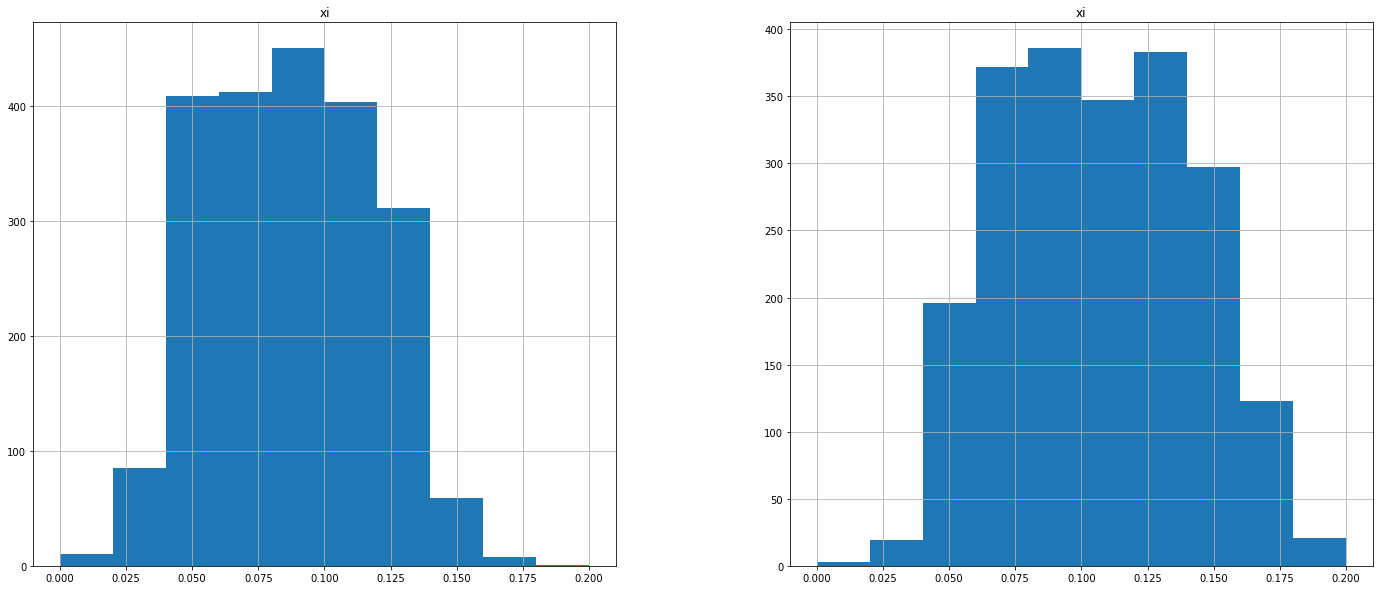

In [10]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP[ df_protons_multiRP.arm == 0 ].hist( "xi", bins=10, range=(0.,0.2), ax=axes[0] )
df_protons_multiRP[ df_protons_multiRP.arm == 1 ].hist( "xi", bins=10, range=(0.,0.2), ax=axes[1] )

In [11]:
df_protons_singleRP

,run,lumiblock,event,xi,thx,thy,t,ismultirp,rpid,arm,...,num_jets_ak4,pfcand_nextracks,pfcand_nextracks_noDRl,recoMWhad,recoMWlep,recoMWW,recoRapidityWW,dphiWW,WLeptonicPt,WLeptonicPhi
0,297411,205,316223040,0.108474,0.0,-1.504139e-05,-0.020134,0,3,-999,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
1,297411,205,316223040,0.108059,0.0,-1.569327e-05,-0.020799,0,23,-999,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
2,297411,205,316223040,0.088566,0.0,-5.547850e-05,-0.126095,0,103,-999,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
3,297411,205,316223040,0.082378,0.0,-5.934368e-05,-0.143040,0,123,-999,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
4,297411,205,316433024,0.047717,0.0,-9.486378e-05,-0.364174,0,3,-999,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
5,297411,205,316433024,0.047727,0.0,-1.046544e-04,-0.442764,0,23,-999,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
6,297411,205,316433024,0.047222,0.0,-2.045062e-05,-0.018895,0,103,-999,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
7,297411,205,316433024,0.045951,0.0,-1.408363e-05,-0.009942,0,123,-999,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
8,297101,370,500976032,0.087486,0.0,-7.064360e-05,-0.199783,0,3,-999,...,2,33,33,64.725227,82.970459,907.498291,0.004048,2.883685,301.053406,-0.373399
9,297101,370,500976032,0.089118,0.0,-7.055031e-05,-0.199223,0,23,-999,...,2,33,33,64.725227,82.970459,907.498291,0.004048,2.883685,301.053406,-0.373399


In [12]:
df_protons_singleiRP_index = df_protons_singleRP.set_index( ['run', 'lumiblock', 'event'] )
df_protons_singleiRP_index

xi  thx           thy         t  ismultirp  \
run    lumiblock event                                                          
297411 205       316223040   0.108474  0.0 -1.504139e-05 -0.020134          0   
                 316223040   0.108059  0.0 -1.569327e-05 -0.020799          0   
                 316223040   0.088566  0.0 -5.547850e-05 -0.126095          0   
                 316223040   0.082378  0.0 -5.934368e-05 -0.143040          0   
                 316433024   0.047717  0.0 -9.486378e-05 -0.364174          0   
                 316433024   0.047727  0.0 -1.046544e-04 -0.442764          0   
                 316433024   0.047222  0.0 -2.045062e-05 -0.018895          0   
                 316433024   0.045951  0.0 -1.408363e-05 -0.009942          0   
297101 370       500976032   0.087486  0.0 -7.064360e-05 -0.199783          0   
                 500976032   0.089118  0.0 -7.055031e-05 -0.199223          0   
                 500976032   0.078594  0.0 -5.923190e-05 -0.142479          0   
                 500976032   0.076931  0.0 -5.824285e-05 -0.137937          0   
       505       668369216   0.132105  0.0 -2.434822e-05 -0.039430          0   
                 668369216   0.132672  0.0 -2.461507e-05 -0.040059          0   
                 668369216   0.132589  0.0 -9.046322e-06 -0.020831          0   
                 668369216   0.133238  0.0 -7.837677e-06 -0.020270          0   
297219 787       1425137280  0.127903  0.0 -7.204179e-05 -0.207736          0   
                 1425137280  0.129348  0.0 -7.001716e-05 -0.197243          0   
                 1425137280  0.079637  0.0 -1.677439e-05 -0.017004          0   
                 1425137280  0.079553  0.0 -1.353199e-05 -0.013171          0   
297050 403       500993152   0.135455  0.0  1.113961e-04 -0.471940          0   
                 500993152   0.135849  0.0  1.115940e-04 -0.473461          0   
                 500993152   0.090587  0.0 -4.056229e-05 -0.071156          0   
                 500993152   0.095069  0.0 -3.681366e-05 -0.060603          0   
297178 697       870605696   0.038426  0.0 -1.202048e-04 -0.588371          0   
                 870605696   0.036216  0.0 -1.396190e-04 -0.794969          0   
                 870605696   0.123786  0.0 -7.312407e-05 -0.213337          0   
                 870605696   0.122550  0.0 -7.271196e-05 -0.211062          0   
297101 862       1071033536  0.103202  0.0 -5.931202e-06 -0.011782          0   
                 1071033536  0.104182  0.0 -5.674456e-06 -0.011879          0   
...                               ...  ...           ...       ...        ...   
306125 2403      3555737088  0.083189  0.0 -6.444719e-05 -0.167526          0   
                 3555737088  0.083710  0.0 -6.308418e-05 -0.160792          0   
306139 24        20476824    0.084931  0.0 -1.083317e-05 -0.011473          0   
                 20476824    0.085980  0.0 -1.145882e-05 -0.012187          0   
                 20476824    0.145620  0.0  1.991157e-05 -0.036149          0   
                 20476824    0.144863  0.0  2.127480e-05 -0.037944          0   
305252 162       200564864   0.102318  0.0 -1.374997e-05 -0.017431          0   
                 200564864   0.103113  0.0 -1.277218e-05 -0.016612          0   
                 200564864   0.056900  0.0  3.832395e-05 -0.061543          0   
                 200564864   0.059302  0.0  4.025502e-05 -0.067694          0   
306092 361       680397120   0.109607  0.0  2.570363e-05 -0.036725          0   
                 680397120   0.110847  0.0  2.572405e-05 -0.037017          0   
                 680397120   0.079068  0.0  8.535532e-06 -0.008808          0   
                 680397120   0.083229  0.0  1.003332e-05 -0.010547          0   
       381       715986240   0.067769  0.0  4.402847e-05 -0.080686          0   
                 715986240   0.068199  0.0  4.375102e-05 -0.079749          0   
                 715986240   0.175065  0.0  7.000290e-05 -0.203484

In [13]:
df_ppstracks

,run,lumiblock,event,x,y,rpid
0,297411,205,316223040,13.161860,4.510451e+00,3
1,297411,205,316223040,7.796552,5.682672e+00,103
2,297411,205,316223040,51.537666,4.244207e+00,23
3,297411,205,316223040,46.737091,5.576784e+00,123
4,297411,205,316433024,7.544739,4.733057e+00,3
5,297411,205,316433024,5.402908,3.931887e+00,103
6,297411,205,316433024,45.978149,4.704774e+00,23
7,297411,205,316433024,44.701096,3.708344e+00,123
8,297101,370,500976032,11.442026,6.176211e+00,3
9,297101,370,500976032,7.612419,5.408221e+00,103


In [14]:
df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event'] )
#df_ppstracks_index
df_ppstracks_index[ ( df_ppstracks_index.rpid != 16 ) & ( df_ppstracks_index.rpid != 116 ) ]

x         y  rpid
run    lumiblock event                                
297411 205       316223040   13.161860  4.510451     3
                 316223040    7.796552  5.682672   103
                 316223040   51.537666  4.244207    23
                 316223040   46.737091  5.576784   123
                 316433024    7.544739  4.733057     3
                 316433024    5.402908  3.931887   103
                 316433024   45.978149  4.704774    23
                 316433024   44.701096  3.708344   123
297101 370       500976032   11.442026  6.176211     3
                 500976032    7.612419  5.408221   103
                 500976032   50.038467  6.117944    23
                 500976032   46.842014  5.303416   123
       505       668369216   16.028858  5.419114     3
                 668369216   11.146255  4.315462   103
                 668369216   54.520702  5.207718    23
                 668369216   50.408752  4.091079   123
297219 787       1425137280  16.204500  8.438501     3
                 1425137280   8.104057  4.211336   103
                 1425137280  54.828094  8.332294    23
                 1425137280  47.444653  3.977894   123
297050 403       500993152   15.889695 -4.042765     3
                 500993152    7.831249  5.180376   103
                 500993152   54.323654 -4.887363    23
                 500993152   47.381531  5.104558   123
297178 697       870605696    7.006719  4.457753     3
                 870605696   11.279790  8.181603   103
                 870605696   45.244946  4.326964    23
                 870605696   50.498589  8.209529   123
297101 862       1071033536  13.390796  4.046581     3
                 1071033536   9.889711  3.196313   103
...                                ...       ...   ...
306125 2403      3555737088  45.263168  3.508112    23
                 3555737088  48.352695  5.082924   123
306139 24        20476824    12.562693 -0.943291     3
                 20476824    14.190883  1.580879   103
                 20476824    50.518238  3.103970    23
                 20476824    53.253166  1.089530   123
305252 162       200564864   14.411287 -0.683488     3
                 200564864    7.443138 -1.276126   103
                 200564864   52.341476  3.315634    23
                 200564864   46.386467  2.032084   123
306092 361       680397120   14.270398  1.240781     3
                 680397120    8.909599 -1.290324   103
                 680397120   52.784256  1.298160    23
                 680397120   47.842960  2.498874   123
       381       715986240   10.227793 -0.258150     3
                 715986240   13.686355  7.745934   103
                 715986240   48.390789  1.623417    23
                 715986240   54.481396 -5.294062   123
       230       428336032    9.203940 -1.000007     3
                 428336032   12.082043  7.490014   103
                 428336032   46.949291  2.112299    23
                 428336032   52.954693 -5.590511   123
       666       1220960128   9.001460 -0.048587     3
                 1220960128  14.213093 -0.832446   103
                 1220960128  46.938103  1.064929    23
                 1220960128  53.055988  3.595257   123
       343       647364928   10.526566 -2.384033     3
                 647364928   10.457870 -1.060397   103
                 647364928   48.107605  4.092021    23
                 647364928   49.152359  2.695959   123

[8652 rows x 3 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1f2019950>],
      dtype=object)

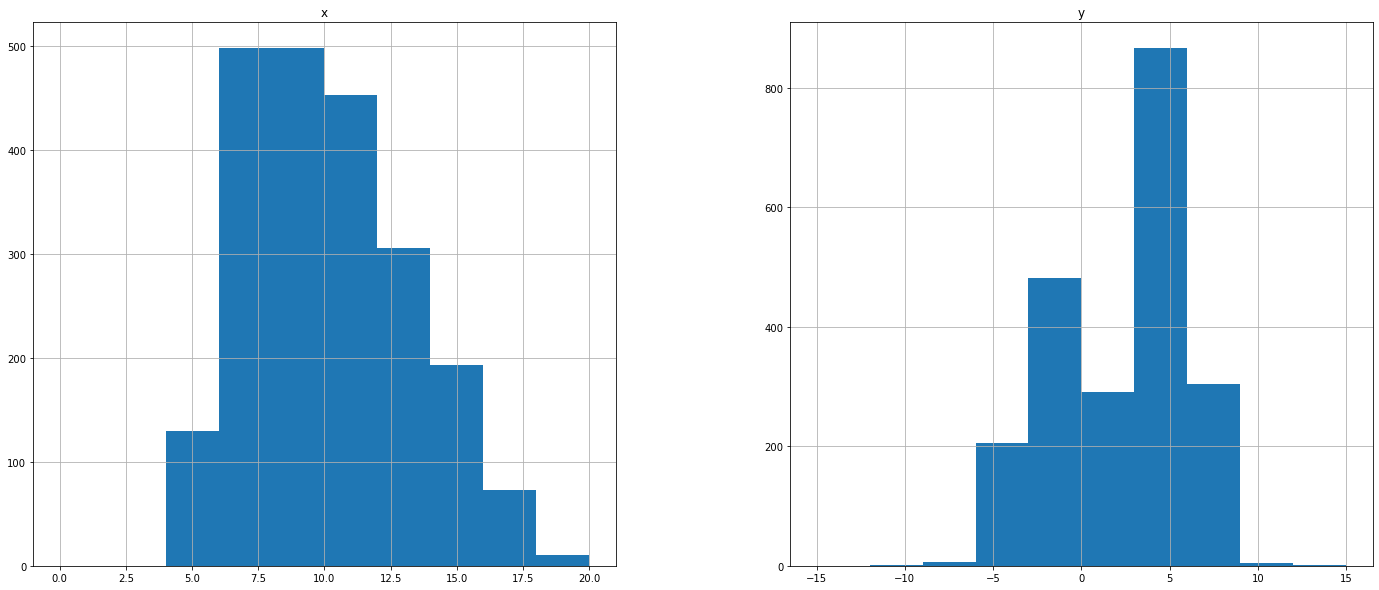

In [15]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_ppstracks[ df_ppstracks.rpid == 103 ].hist( "x", bins=10, range=(0.,20.), ax=axes[0] )
df_ppstracks[ df_ppstracks.rpid == 103 ].hist( "y", bins=10, range=(-15.,15.), ax=axes[1] )

### References

In [16]:
np.info( ak.concatenate )

 concatenate(arrays, axis=0, mergebool=True, highlevel=True)

Args:
    arrays: Arrays to concatenate along any dimension.
    axis (int): The dimension at which this operation is applied. The
        outermost dimension is `0`, followed by `1`, etc., and negative
        values count backward from the innermost: `-1` is the innermost
        dimension, `-2` is the next level up, etc.
    mergebool (bool): If True, boolean and nummeric data can be combined
        into the same buffer, losing information about False vs `0` and
        True vs `1`; otherwise, they are kept in separate buffers with
        distinct types (using an #ak.layout.UnionArray8_64).
    highlevel (bool): If True, return an #ak.Array; otherwise, return
        a low-level #ak.layout.Content subclass.

Returns an array with `arrays` concatenated. For `axis=0`, this means that
one whole array follows another. For `axis=1`, it means that the `arrays`
must have the same lengths and nested lists are each concatenated,

In [17]:
np.info( pd.DataFrame.hist )

 hist_frame(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None,
            ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False,
            figsize=None, layout=None, bins=10, **kwds)

Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : string or sequence
    If passed, will be used to limit data to a subset of columns.
by : object, optional
    If passed, then used to form histograms for separate groups.
grid : boolean, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation of x axis labels. For example, a value of 90 displays the
 